### Read Data

In [406]:
import pandas as pd

# Memuat dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

# Melihat beberapa baris pertd
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Data Preprocessing and EDA

In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #Heatmap
from sklearn.preprocessing import LabelEncoder
import pickle

import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#TF



import tensorflow as tf
import keras
from keras.models import Sequential


from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

[nltk_data] Downloading package punkt to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\GAMING
[nltk_data]     3I\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [408]:
# Hanya mengambil kolom yang dibutuhkan
dataset = data[['v1', 'v2']]
dataset.columns = ['label', 'message']

# Mengubah label menjadi biner
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})

# Memeriksa distribusi kelas
print(dataset['label'].value_counts())


0    4825
1     747
Name: label, dtype: int64


C:\Users\GAMING 3I\AppData\Local\Temp\ipykernel_1896\4230030083.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})


In [409]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [411]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.rename(columns={'v1':'target','v2':'text'},inplace=True) #drop columns
data = data.drop_duplicates(keep='first') #drop duplicates
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target']) #1 hot
data.head()



,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [412]:
# Menghitung jumlah nilai null dan duplikat
null_counts = data.isnull().sum()
num_duplicates = data.duplicated().sum()

# Menampilkan hasil
print(null_counts)
print(f'Num duplicates: {num_duplicates}')

# Menampilkan dimensi DataFrame
data_shape = data.shape
print(f'DataFrame shape: {data_shape}')


target    0
text      0
dtype: int64
Num duplicates: 0
DataFrame shape: (5169, 2)


0    4516
1     653
Name: target, dtype: int64


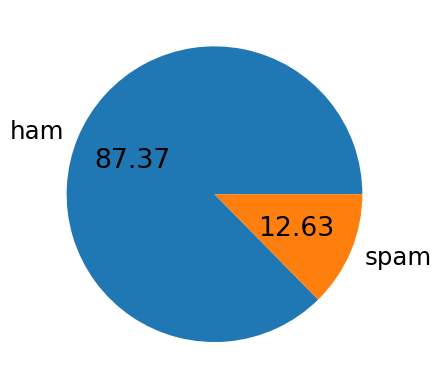

In [413]:
print(data['target'].value_counts())
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()



In [414]:
# Menggunakan fungsi lambda untuk menghitung jumlah karakter, kata, dan kalimat
data['num_characters'] = data['text'].str.len()
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentences'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

# Menampilkan lima baris pertama dari DataFrame
data.head()



,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [415]:
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\GAMING 3I\AppData\Local\Temp\ipykernel_1896\841659234.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(),


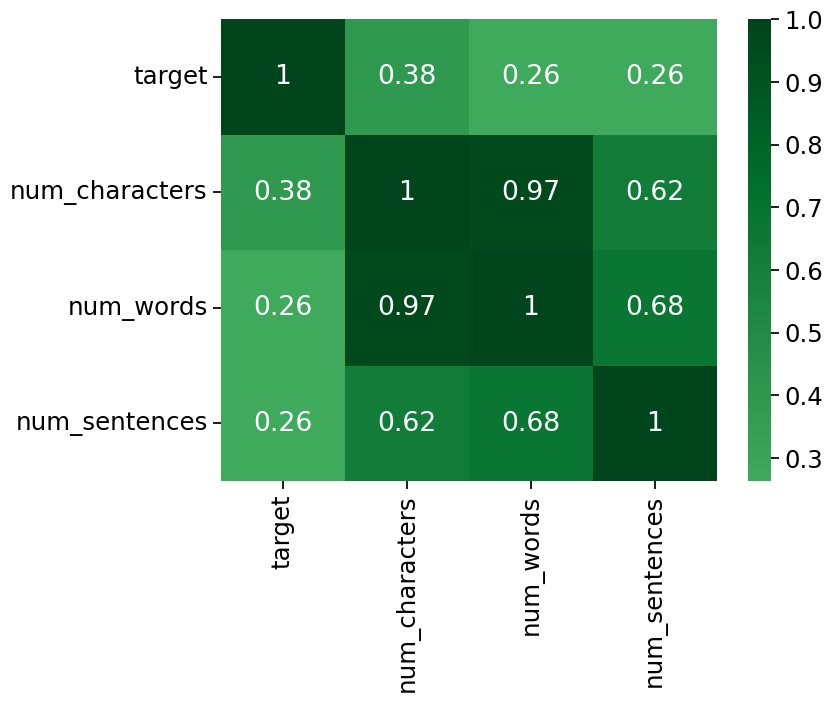

In [416]:
# Membuat subplot dan sumbu (ax) untuk heatmap
fig, ax = plt.subplots(figsize=(8, 6))
# Menggambar heatmap
sns.heatmap(data=data.corr(),
            annot=True,
            cmap="Greens",
            center=0,
            ax=ax)
plt.show()
# Men


In [417]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
def transform_text(text):
    # Inisialisasi objek PorterStemmer dan set stopwords
    ps = PorterStemmer()
    stopwords_set = set(stopwords.words('english'))
    
    
    # Tokenisasi teks setelah mengonversi menjadi huruf kecil dan hapus token non-alphanumeric
    tokens = [word for word in word_tokenize(text.lower()) if word.isalnum()]
    
    # Filter token yang bukan stopwords dan bukan tanda baca
    filtered_tokens = filter(lambda token: token not in stopwords_set and token not in string.punctuation, tokens)
    
    # Lakukan stemming pada token yang tersisa
    stemmed_tokens = map(ps.stem, filtered_tokens)
    
    # Gabungkan token menjadi string akhir
    return " ".join(stemmed_tokens)


In [418]:
# Mendefinisikan variabel untuk teks asli dan teks yang telah ditransformasikan
###original_text = data.loc[10, 'text']
###transformed_text = transform_text(original_text)

# Mencetak kedua teks tersebut dengan format yang diinginkan
###print("Original Text:\n{}\n\nTransformed Text:\n{}".format(original_text, transformed_text))


In [419]:
# Menggunakan fungsi map untuk menerapkan transform_text ke setiap elemen di kolom 'text'
data = data.assign(transformed_text=data['text'].map(transform_text))

# Menampilkan lima baris pertama dari DataFrame yang diperbarui
data['transformed_text'].replace('', np.nan, inplace=True)
data.dropna(subset=['transformed_text'], inplace=True)
print(data.head())


   target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though  


In [420]:
text_data = " ".join(data['transformed_text'])
spam_texts = data[data['target'] == 1]['transformed_text']

# Gabungkan semua teks spam menjadi satu string besar
spam_text_data = " ".join(spam_texts)

In [421]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [422]:
#ata['text_prep1'] = data['transformed_text'].apply(remove_stopwords)
#data

In [423]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()

    kamus = {'kata':check.index,'freq':check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis = 1, inplace = True)
    kamus.sort_values('freq',ascending=False,inplace=True)
    
    return kamus

In [424]:
kamus_unclean = kamus(data['transformed_text'])

<Axes: ylabel='kata'>

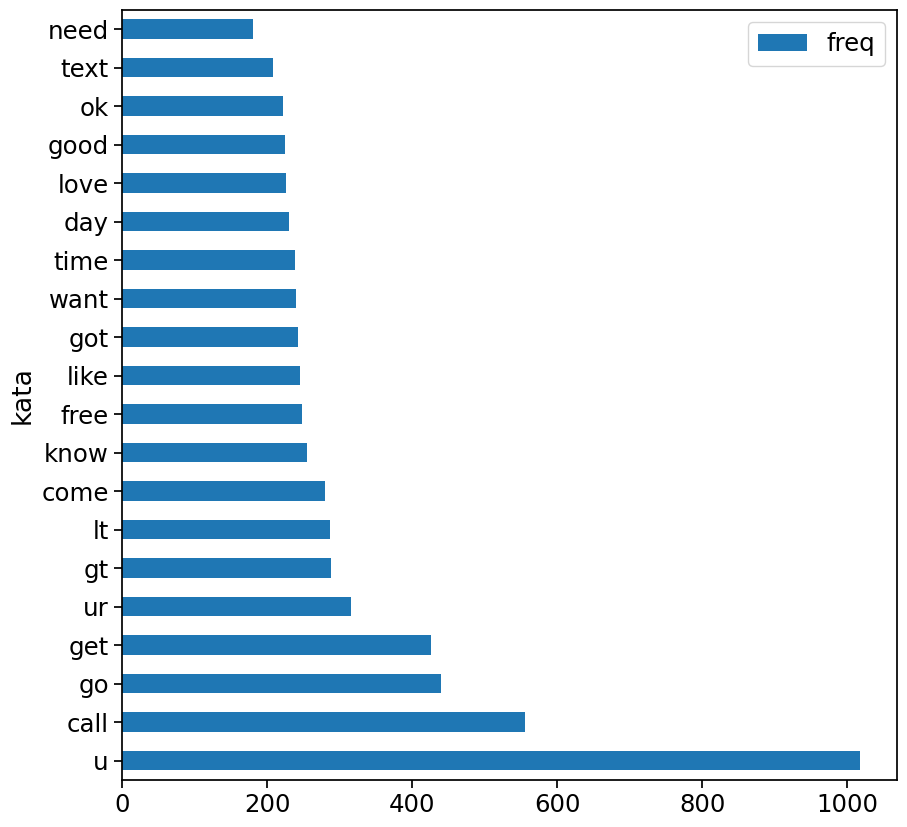

In [425]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean[:20].plot(kind = 'barh',figsize = (10,10))

In [426]:
from wordcloud import WordCloud
import matplotlib.pyplot as plssst

Word Cloud untuk teks HAM:


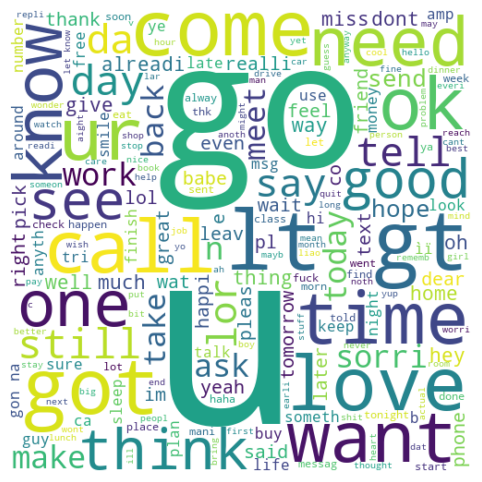

Word Cloud untuk teks SPAM:


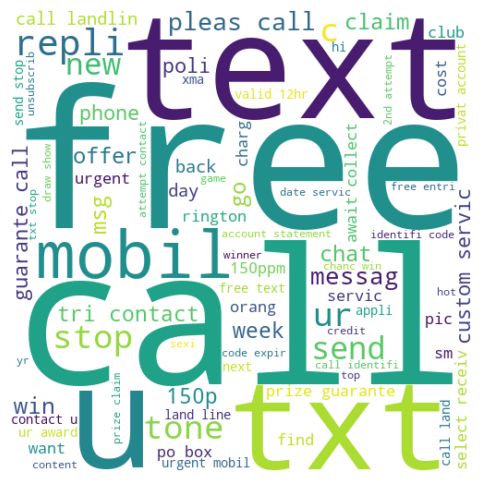

In [427]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Fungsi untuk membuat dan menampilkan word cloud
def generate_word_cloud(data, target_value):
    """
    Membuat dan menampilkan word cloud dari teks dalam kolom 'transformed_text'
    berdasarkan nilai target yang diberikan.
    
    :param data: DataFrame dengan kolom 'transformed_text' dan 'target'
    :param target_value: Nilai target untuk memfilter data (0 untuk ham, 1 untuk spam)
    """
    # Filter teks berdasarkan nilai target (0 untuk ham, 1 untuk spam)
    filtered_texts = data[data['target'] == target_value]['transformed_text']

    # Gabungkan semua teks yang telah difilter menjadi satu string besar
    combined_text_data = " ".join(filtered_texts)

    # Periksa apakah string teks tidak kosong
    if combined_text_data.strip():
        # Buat word cloud dari teks gabungan
        word_cloud = WordCloud(width=500, height=500, min_font_size=10, background_color='white').generate(combined_text_data)

        # Fungsi untuk menampilkan word cloud
        def plot_cloud(wordcloud):
            plt.figure(figsize=(10, 6))  # Set ukuran gambar
            plt.imshow(wordcloud, interpolation='bilinear')  # Tampilkan gambar word cloud
            plt.axis("off")  # Hilangkan sumbu
            plt.show()  # Tampilkan plot

        # Panggil fungsi plot_cloud untuk menampilkan word cloud
        plot_cloud(word_cloud)
    else:
        print(f"Tidak ada teks {'ham' if target_value == 0 else 'spam'} yang valid untuk membuat word cloud.")

# Menghasilkan dan menampilkan word cloud untuk teks HAM
print("Word Cloud untuk teks HAM:")
generate_word_cloud(data, 0)

# Menghasilkan dan menampilkan word cloud untuk teks SPAM
print("Word Cloud untuk teks SPAM:")
generate_word_cloud(data, 1)


In [428]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [429]:
###def plot_cloud(wordcloud):
    # Set figure size
    #plt.figure(figsize=(20, 10))
    # Display image
##    plt.imshow(wordcloud) 
    # No axis details
 ###   plt.axis("off")

In [430]:
#word_cloud = WordCloud().generate(str(data['transformed_text']))

In [431]:
#from wordcloud import WordCloud

#plot_cloud(word_cloud)

In [432]:
data.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Model Prepared and Model Building
#### Model used RNN

In [433]:
# Pastikan 'transformed_text' dan 'target' adalah bagian dari DataFrame 'data'
X = data['transformed_text']  # Menggunakan kolom 'transformed_text' sebagai fitur input
y = data['target'].values  # Menggunakan kolom 'target' sebagai label

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengatur parameter untuk tokenisasi dan padding
max_words = 1000  # Jumlah maksimum kata yang akan diambil dari frekuensi tertinggi
max_len = 150  # Panjang maksimum setiap urutan teks

# Membuat objek Tokenizer untuk proses tokenisasi teks
tok = Tokenizer(num_words=max_words)

# Membangun indeks kata berdasarkan data pelatihan
tok.fit_on_texts(X_train)

# Mengubah teks menjadi urutan token
sequences_train = tok.texts_to_sequences(X_train)
sequences_test = tok.texts_to_sequences(X_test)

# Melakukan padding pada urutan agar semua memiliki panjang yang sama
sequences_matrix_train = pad_sequences(sequences_train, maxlen=max_len)
sequences_matrix_test = pad_sequences(sequences_test, maxlen=max_len)

# Menampilkan hasil dari padding (bentuk array)
print(f'Shape of Training Data: {sequences_matrix_train.shape}')
print(f'Shape of Test Data: {sequences_matrix_test.shape}')

Shape of Training Data: (4128, 150)
Shape of Test Data: (1032, 150)


In [434]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


# #def RNN():
#     inputs = Input(name='inputs', shape=[max_len])
    
#     # Embedding Layer
#     embedding_layer = Embedding(input_dim=max_words, output_dim=50, input_length=max_len)(inputs)
    
    
#     # Batch Normalization Layer
#     batch_norm_layer = BatchNormalization()(lstm_layer)
    
#     # Dropout after Batch Normalization
#     dropout_layer1 = Dropout(rate=0.5)(batch_norm_layer)
    
#     # LSTM Layer with L2 Regularization and Dropout
#     lstm_layer = LSTM(units=32, kernel_regularizer=l2(0.03), return_sequences=False)(embedding_layer)
#     dropout_layer1 = Dropout(rate=0.5)(lstm_layer)
    
#     # Dense Layer with L2 Regularization and Dropout
#     dense_layer = Dense(units=128, name='FC1', kernel_regularizer=l2(0.03))(dropout_layer1)
#     activation_layer = Activation('relu')(dense_layer)
#     dropout_layer2 = Dropout(rate=0.5)(activation_layer)
    
#     # Output Layer
#     output_layer = Dense(units=1, name='out_layer')(dropout_layer2)
#     output_activation = Activation('sigmoid')(output_layer)
    
#     # Creating the Model
#     model = Model(inputs=inputs, outputs=output_activation)

#     return model


In [435]:
# Define the model architecture with Dropout and L2 regularization
def build_model(vocab_size, embedding_dim, input_length):
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=input_length))
    model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))  # Adding dropout to reduce overfitting
    model.add(LSTM(64, kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model



In [436]:

# Display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 100)          598200    
                                                                 
 lstm_8 (LSTM)               (None, 150, 128)          117248    
                                                                 
 dropout_9 (Dropout)         (None, 150, 128)          0         
                                                                 
 lstm_9 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0

In [437]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.sequence import pad_sequences

vocab_size = len(tok.word_index) + 1  # +1 untuk kata yang tidak ditemukan dalam data pelatihan
# Compile the model
model = build_model(vocab_size=vocab_size, embedding_dim=100, input_length=max_len)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



# Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001, verbose=1)
# Tokenize and pad the sequences
X_train_sequences = tok.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len)

# Train the model
history = model.fit(
    X_train_padded,
    y_train,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stop]
)

# Prepare the test data sequences
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen=max_len)

Epoch 1/10
13/13 [==============================] - 24s 2s/step - loss: 0.9048 - accuracy: 0.8280 - val_loss: 0.7190 - val_accuracy: 0.8656
Epoch 2/10
13/13 [==============================] - 22s 2s/step - loss: 0.7019 - accuracy: 0.8728 - val_loss: 0.6469 - val_accuracy: 0.8656
Epoch 3/10
13/13 [==============================] - 23s 2s/step - loss: 0.6379 - accuracy: 0.8731 - val_loss: 0.5946 - val_accuracy: 0.8656
Epoch 4/10
13/13 [==============================] - 24s 2s/step - loss: 0.5773 - accuracy: 0.8728 - val_loss: 0.5477 - val_accuracy: 0.8656
Epoch 5/10
13/13 [==============================] - 23s 2s/step - loss: 0.5288 - accuracy: 0.8731 - val_loss: 0.4786 - val_accuracy: 0.8656
Epoch 6/10
13/13 [==============================] - 24s 2s/step - loss: 0.4179 - accuracy: 0.8822 - val_loss: 0.3213 - val_accuracy: 0.9370
Epoch 7/10
13/13 [==============================] - 24s 2s/step - loss: 0.2799 - accuracy: 0.9549 - val_loss: 0.2351 - val_accuracy: 0.9697
Epoch 8/10
13/13 [==

In [438]:
#test_sequences = tok.texts_to_sequences(X_test)
#test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [439]:
accr = model.evaluate(test_sequences_matrix, y_test)

33/33 [==============================] - 2s 71ms/step - loss: 0.1983 - accuracy: 0.9729


### Model Result RNN

Test set
  Loss: 0.198
  Accuracy: 0.973


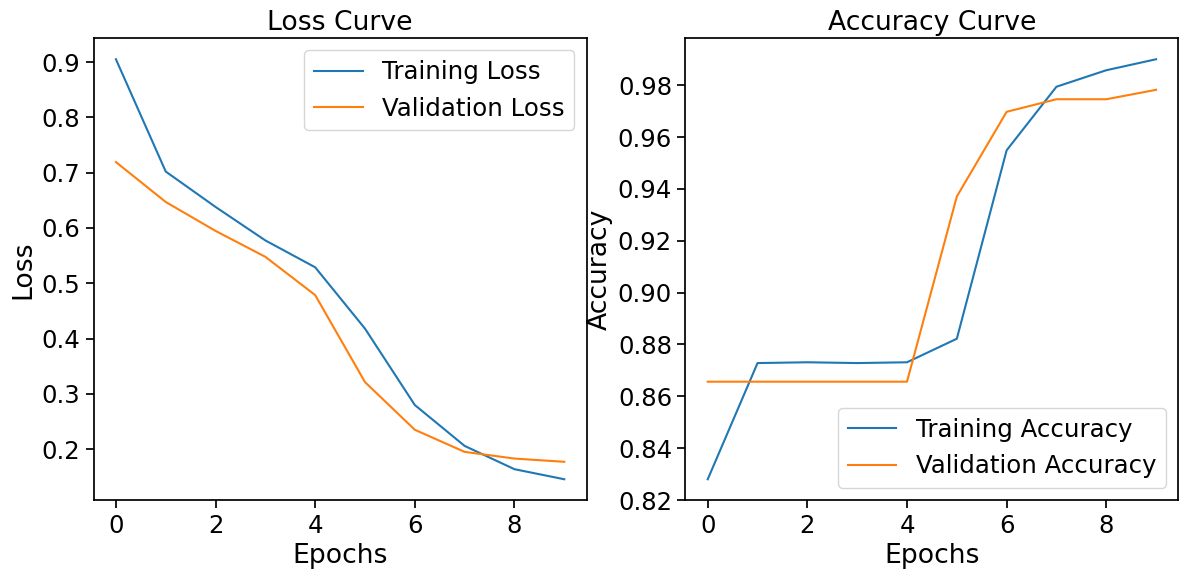

In [440]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Plotting loss and accuracy
plt.figure(figsize=(14, 6))

# Plot loss for training and validation
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy for training and validation
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show plots
plt.show()

#### Gambar tersebut menunjukkan kinerja model RNN selama pelatihan dan validasi dalam tugas klasifikasi teks.

Dari kedua grafik ini, terlihat bahwa model bekerja dengan baik tanpa overfitting yang signifikan. Kurva kerugian yang menurun dan kurva akurasi yang meningkat, baik untuk data pelatihan maupun validasi, menunjukkan bahwa model mampu belajar dari data pelatihan dan juga melakukan generalisasi dengan baik pada data yang belum pernah dilihat (validasi). Ini adalah indikasi model yang sehat, di mana Training Loss dan Validation Loss menurun bersamaan dengan peningkatan akurasi pada kedua set data.